Wersja 1. Opracować własny styl, w czterech odmianach tematycznych np.:
Cztery pory roku
Cztery pory dnia
Cztery żywioły
Cztery minerały
….
Każdy styl powinien obejmować wspólne elementy formatujące (czcionki, wielkości elementów,
lokalizacje etykiet) formatujące obiekty oraz elementy estetyczne (kolory, wozrki, przeźroczystości)
odrębne dla każdej odmiany.


Niezależnie od wersji: Odmiany stylów prezentujemy na planszy 2x2, zawierającej 4 wykresy:
• wykres punktowy,
• liniowy,
• obszarowy (np. barplot)
• image.
Wszystkie elementy ujęte w stylu (palety, cyclery, wzorki, itp.) muszą być ujęte na co najmniej
jednym z wykresów. Elementy formatujące o ile to możliwe powinny być ujęte na wszystkich
wykresach.


In [1]:
# librarys

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib import cm

In [18]:
#DATA

df = pd.read_csv("data/heart_disease_uci.csv")
df['age_group'] = pd.cut(df['age'], bins=range(25, 85, 5), right=False)
df.head(5)
avg_blood_pressure = df.groupby('age_group')['trestbps'].mean()

df['is_sick'] = df['num'] != 0

pivot = pd.pivot_table(df, values='num', index='restecg', columns='cp', aggfunc='mean')

features = ['fbs', 'exang', "both"]

subsets = [df[(df['sex'] == 'Male') & (df['exang'])],
df[(df['sex'] == 'Female') & (df['exang'])],
df[(df['sex'] == 'Male') & (df['fbs'])],
df[(df['sex'] == 'Female') & (df['fbs'])],
df[(df['sex'] == 'Male') & (df['fbs']) & (df['exang'])],
df[(df['sex'] == 'Female') & (df['fbs']) & (df['exang'])]]

proportions = []

for subset in subsets:
    if subset.shape[0] == 0:
        print("Subset is empty, skipping calculation.")
        continue

    proportion = subset[subset['is_sick']].shape[0]/subset.shape[0]
    proportions.append(proportion)

proportions_names = ['dławica meżczyźni', 'dławica kobiety','wpc mezczyźni', 'wpc kobiety', 'oba mezczyźni', 'oba kobiety']

proportions

C:\Users\MSi\AppData\Local\Temp\ipykernel_22296\2357661061.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_blood_pressure = df.groupby('age_group')['trestbps'].mean()


[0.8673469387755102,
 0.627906976744186,
 0.7142857142857143,
 0.47368421052631576,
 0.8837209302325582,
 0.7142857142857143]

Column Descriptions:
id: (Unique id for each patient)
age: (Age of the patient in years)
origin: (place of study)
sex: (Male/Female)
cp: chest pain type:
1. typical angina
2. atypical angina
3. non-anginal
4. asymptomatic
trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol: (serum cholesterol in mg/dl)
fbs: (if fasting blood sugar > 120 mg/dl)
restecg: (resting electrocardiographic results)
Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute [0 shows no disease and 1, 2, 3 and 4 shows different level of disease]

In [ ]:
# Styles

C:\Users\MSi\AppData\Local\Temp\ipykernel_22296\3398117905.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sleep_heart_rate = df.groupby('age_group')['trestbps'].mean()
C:\Users\MSi\AppData\Local\Temp\ipykernel_22296\3398117905.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_max_heart_rate = df.groupby('age_group')['thalch'].mean()
Missing colon in file 'styles/subway', line 34 ('scatter.marker = ^')
C:\Users\MSi\AppData\Local\Temp\ipykernel_22296\3398117905.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

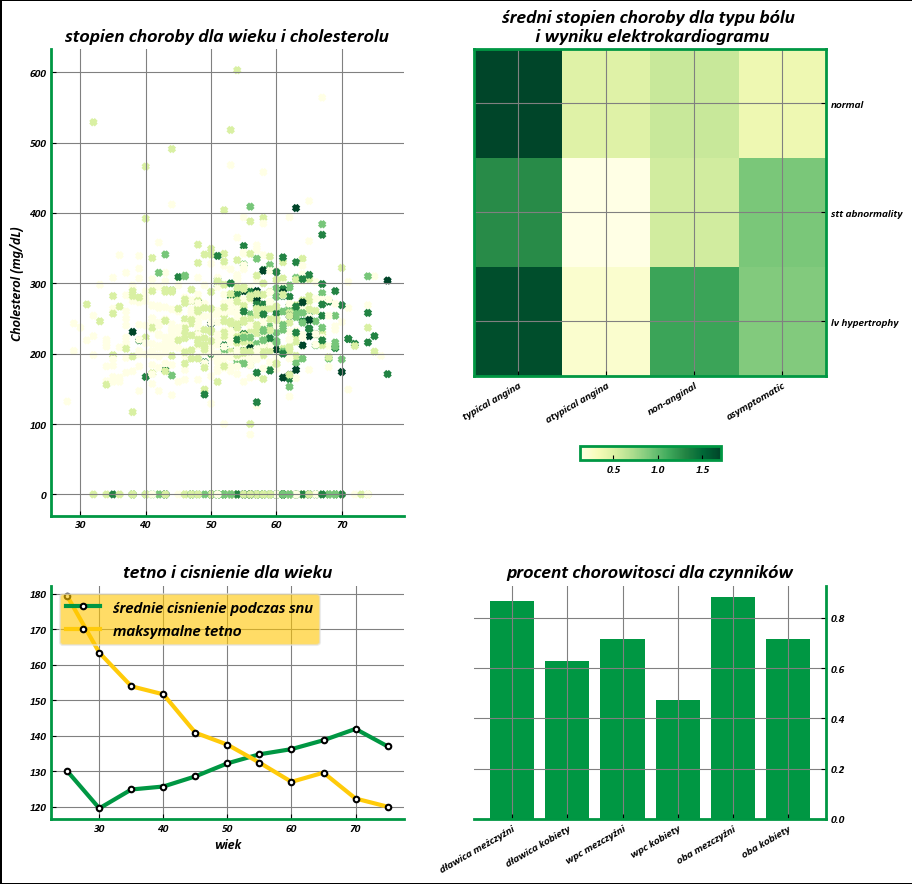

In [117]:
#Plot

cholesterol = df['chol']
age = df['age']
age_group = [25,30,35,40,45,50,55,60,65,70,75]

avg_sleep_heart_rate = df.groupby('age_group')['trestbps'].mean()
avg_max_heart_rate = df.groupby('age_group')['thalch'].mean()

num = df['num']


plt.style.use('styles/subway')

gsk = {'hspace': 0.2,'height_ratios':[2,1],'wspace': 0.2 }
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10),gridspec_kw=gsk)

scatter = ax1.scatter(y = cholesterol, x = age,c = num)
ax1.spines.top.set_visible(False)
#ax1.xaxis.set_tick_params(bottom=False,labelbottom=False)
ax1.spines['right'].set_visible(False)
ax1.set_title('stopien choroby dla wieku i cholesterolu')
ax1.set_ylabel('Cholesterol (mg/dL)')

ax4.bar(x = proportions_names, height= proportions)
ax4.spines.left.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.yaxis.set_ticks_position('right')
ax4.set_title("procent chorowitosci dla czynników")
plt.setp(ax4.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

ax3.plot(age_group ,avg_sleep_heart_rate,label = 'średnie cisnienie podczas snu')
ax3.plot(age_group ,avg_max_heart_rate, label = 'maksymalne tetno')
ax3.spines.top.set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_title("tetno i cisnienie dla wieku")
ax3.set_xlabel('wiek')
ax3.legend(loc='upper left')

img = ax2.imshow(X = pivot)
fig.colorbar(img, ax=ax2,shrink=0.4, aspect=10,location='bottom') 
ax2.plot()
ax2.yaxis.set_ticks_position('right')
ax2.set_title("średni stopien choroby dla typu bólu \n i wyniku elektrokardiogramu" )

y_values = ['','normal', 'stt abnormality', 'lv hypertrophy']
x_values = ['','typical angina',
'atypical angina',
'non-anginal',
'asymptomatic']

from matplotlib.ticker import MaxNLocator
ax2.xaxis.set_major_locator(MaxNLocator(4))  # Set maximum number of ticks to 5 on x-axis
ax2.yaxis.set_major_locator(MaxNLocator(3))

ax2.set_xticklabels(x_values)
ax2.set_yticklabels(y_values)
plt.setp(ax2.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)
plt.savefig('subway.pdf', format='pdf')
plt.show()